# Business Understanding

The goal of this project is to analyze the 2024 Developer Survey dataset to uncover trends and insights that can help businesses, educators, and decision-makers better understand the developer community. By exploring key aspects such as programming languages, tools, remote work preferences, and interest in AI technologies, i aim to answer critical questions that can inform decision-making and strategy development.

## proplem statment 
Understanding developers' preferences and challenges is crucial for:

Businesses: To attract talent, invest in the right technologies, and build better products.

Educators: To design courses that teach in-demand skills.

decision-makers: To support innovation and tech industry growth.

# Data Understanding

- **Dataset Overview:** The dataset contains information about developers including their technology preferences, work habits, and challenges.
- **Key Focus:** Identify missing values, data types, and perform initial exploratory data analysis.


In [104]:
# importing libraries 
import numpy as np 
import pandas as pd
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt
# Ignore all warnings
warnings.filterwarnings("ignore")

In [105]:
# loading the dataset
df = pd.read_csv('survey_results_public.csv')
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [106]:
df.shape

(65437, 114)

observation: as we see the dataset is huge it has 114 variable and 65437 observations we need elminate unimportant variables and fucus on the needed ones 

In [107]:
# see how many are misssing
print(df.isnull().sum())

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


we will elminate also the variables that has missing values more then average 

# Data Preparation

In this section, we clean the dataset by:
- Handling missing values.
- Encoding categorical variables.
- Removing highly correlated features.


## Data Cleaining 

In [108]:
def handle_missing_values(df, threshold):
    """
    Fill missing values by dropping columns that have more than a specified percentage (threshold) of missing data.
    
    Parameters:
    - df (pd.DataFrame): The input dataset.
    - threshold (float): Percentage threshold for missing values.
    
    Returns:
    - pd.DataFrame: Cleaned dataset.
    """
    # Calculate the percentage of missing values in each column
    missing_data = df.isnull().mean() * 100
    # Identify columns where missing data is greater than the threshold
    columns_to_drop = missing_data[missing_data > threshold].index
    # Drop these columns
    df = df.drop(columns=columns_to_drop)
    return df


In [109]:
# Drop these columns from the dataset  
df = handle_missing_values(df,50)  
df.shape


(65437, 70)

observation: we droped less than the half of the variables because they containes missing values more than 50%

In [110]:
# Select only numeric columns from the dataset  
numeric_df = df.select_dtypes(include=['number'])  

# Compute the correlation matrix for numeric columns  
corr_matrix = numeric_df.corr()  

# Identify columns that have a high correlation (absolute correlation > 0.90)  
high_corr = corr_matrix[abs(corr_matrix) > 0.90].index  

# Drop these highly correlated columns to reduce redundancy  
df = df.drop(columns=high_corr)  
df.shape


(65437, 68)

 removing highly correlated features, preventing multicollinearity

In [115]:
# List of columns to keep
columns_to_keep = [
    'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 
    'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country', 'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
    'ToolsTechHaveWorkedWith', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'AISelect', 
    'AISent', 'AIBen', 'AIAcc', 'AIComplex', 'AIToolCurrently Using', 'AIThreat', 
    'AIChallenges'
]

# Keep only the selected columns
df_cleaned = df[columns_to_keep]

# Check the cleaned dataset
print(df_cleaned.shape)


(65437, 29)


In [116]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      65437 non-null  object
 1   Employment               65437 non-null  object
 2   RemoteWork               54806 non-null  object
 3   CodingActivities         54466 non-null  object
 4   EdLevel                  60784 non-null  object
 5   YearsCode                59869 non-null  object
 6   YearsCodePro             51610 non-null  object
 7   DevType                  59445 non-null  object
 8   OrgSize                  47480 non-null  object
 9   Country                  58930 non-null  object
 10  LanguageHaveWorkedWith   59745 non-null  object
 11  LanguageWantToWorkWith   55752 non-null  object
 12  DatabaseHaveWorkedWith   50254 non-null  object
 13  DatabaseWantToWorkWith   42558 non-null  object
 14  PlatformHaveWorkedWith   42366 non-nul

In [ ]:
# Drop columns where more than 30% of the data is missing
df_cleaned = handle_missing_values(df_cleaned,30)

# Check the cleaned dataset
df_cleaned.shape

(65437, 18)

In [118]:
df_cleaned.columns

Index(['Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'Country',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'ToolsTechHaveWorkedWith', 'SOVisitFreq',
       'SOAccount', 'AISelect', 'AISent'],
      dtype='object')

In [87]:
print(df_cleaned.dtypes)


Age                        object
Employment                 object
RemoteWork                 object
CodingActivities           object
EdLevel                    object
YearsCode                  object
YearsCodePro               object
DevType                    object
OrgSize                    object
Country                    object
LanguageHaveWorkedWith     object
LanguageWantToWorkWith     object
DatabaseHaveWorkedWith     object
ToolsTechHaveWorkedWith    object
SOVisitFreq                object
SOAccount                  object
AISelect                   object
AISent                     object
dtype: object


In [119]:
# Function to map non-numeric values to numeric
def map_years(value):
    if value == 'Less than 1 year':
        return 0.5
    elif value == '10-20 years':
        return 15
    elif value == 'More than 50 years':
        return 50
    elif value == 'Yes' or value == 'No':
        return None  # Handle unclear values as missing
    else:
        return float(value)

# Apply mapping to 'YearsCode' and 'YearsCodePro'
df_cleaned['YearsCode'] = df_cleaned['YearsCode'].apply(map_years)
df_cleaned['YearsCodePro'] = df_cleaned['YearsCodePro'].apply(map_years)

# Convert columns to numeric
df_cleaned['YearsCode'] = pd.to_numeric(df_cleaned['YearsCode'], errors='coerce')
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')



#### handiling missing values from continues and catagorical variables

In [120]:
# Impute numerical columns with the median and categorical columns with the mode
for column in df_cleaned.columns:
    if df_cleaned[column].dtype == 'object':  # Categorical columns
        df_cleaned[column].fillna(df_cleaned[column].mode()[0], inplace=True)
    else:  # Numerical columns
        df_cleaned[column].fillna(df_cleaned[column].median(), inplace=True)

# Verify if there are still any missing values
df_cleaned.isnull().sum()


Age                        0
Employment                 0
RemoteWork                 0
CodingActivities           0
EdLevel                    0
YearsCode                  0
YearsCodePro               0
DevType                    0
OrgSize                    0
Country                    0
LanguageHaveWorkedWith     0
LanguageWantToWorkWith     0
DatabaseHaveWorkedWith     0
ToolsTechHaveWorkedWith    0
SOVisitFreq                0
SOAccount                  0
AISelect                   0
AISent                     0
dtype: int64

In [121]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      65437 non-null  object 
 1   Employment               65437 non-null  object 
 2   RemoteWork               65437 non-null  object 
 3   CodingActivities         65437 non-null  object 
 4   EdLevel                  65437 non-null  object 
 5   YearsCode                65437 non-null  float64
 6   YearsCodePro             65437 non-null  float64
 7   DevType                  65437 non-null  object 
 8   OrgSize                  65437 non-null  object 
 9   Country                  65437 non-null  object 
 10  LanguageHaveWorkedWith   65437 non-null  object 
 11  LanguageWantToWorkWith   65437 non-null  object 
 12  DatabaseHaveWorkedWith   65437 non-null  object 
 13  ToolsTechHaveWorkedWith  65437 non-null  object 
 14  SOVisitFreq           

## What factors influence developers' interest in AI tools?

In [122]:
df_cleaned['EdLevel'].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          29595
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15557
Some college/university study without earning a degree                                 7651
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5793
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2970
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1146
Something else                                                                          932
Name: count, dtype: int64

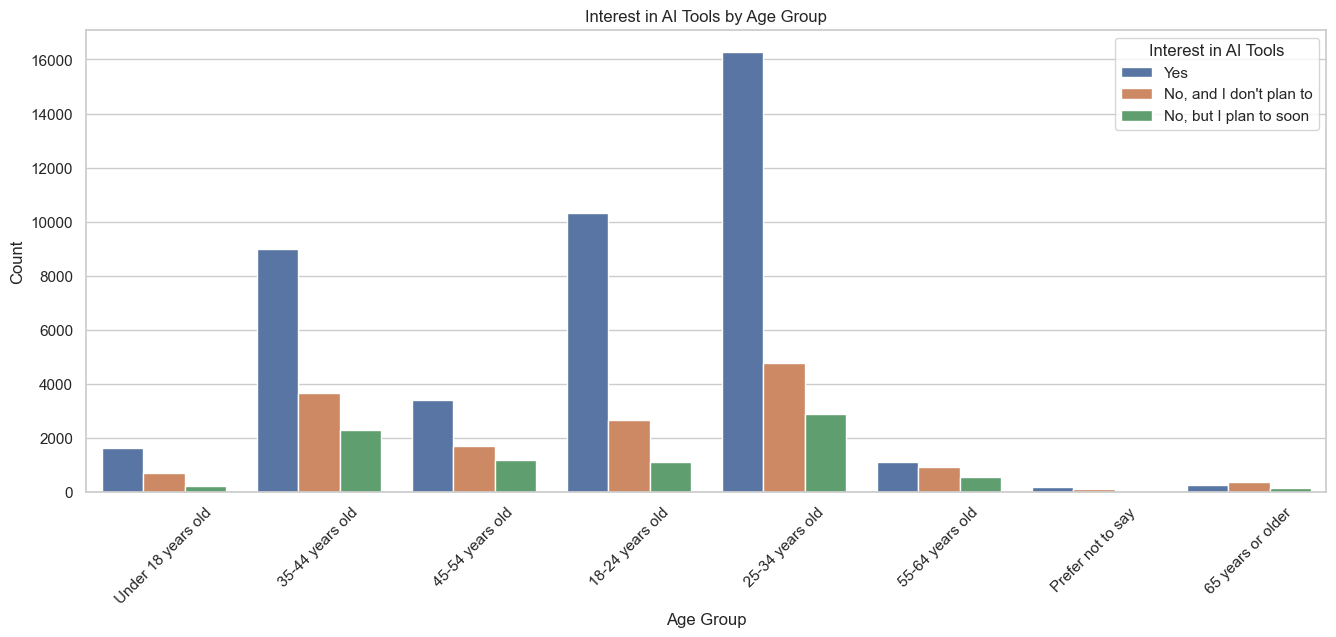

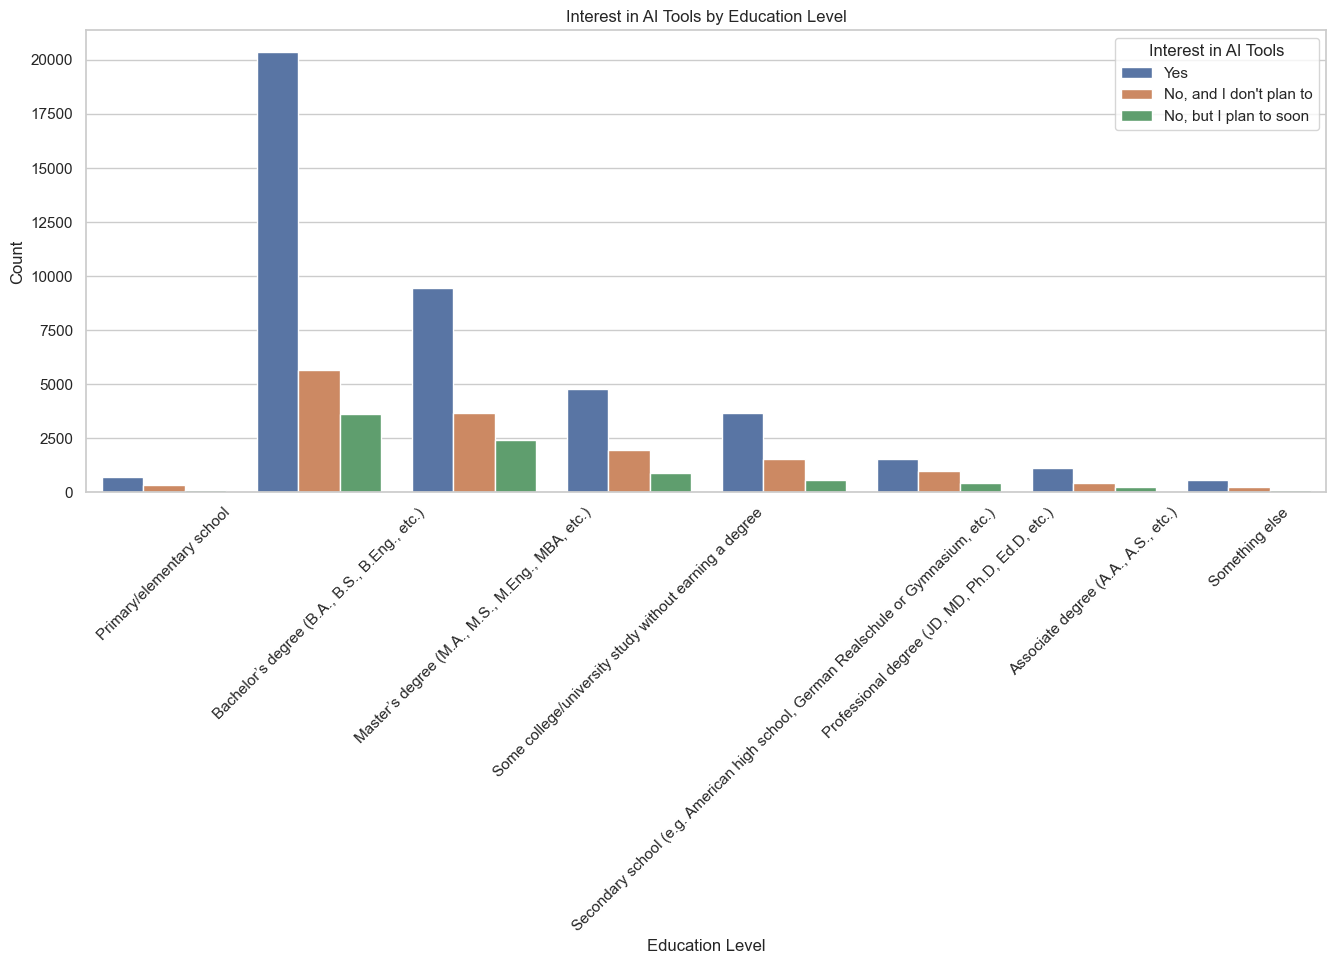

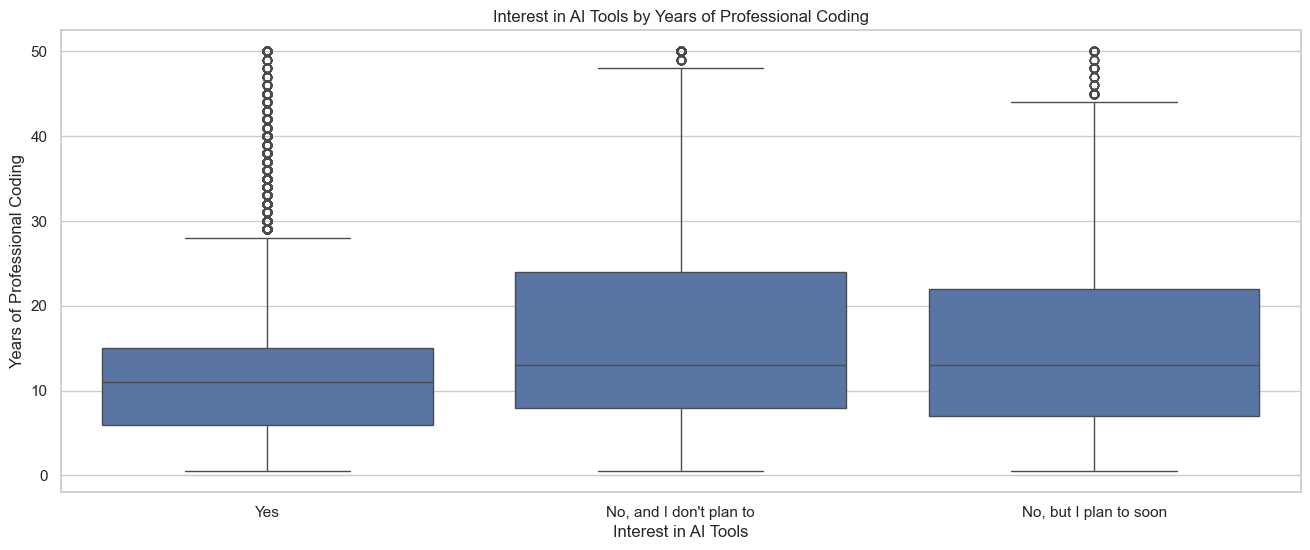

In [123]:
# Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Analyze the relationship between Age and AISelect
plt.figure(figsize=(16, 6))
sns.countplot(x='Age', hue='AISelect', data=df_cleaned)
plt.title('Interest in AI Tools by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Interest in AI Tools')
plt.show()

# Analyze the relationship between Education Level and AISelect
plt.figure(figsize=(16, 6))
sns.countplot(x='EdLevel', hue='AISelect', data=df_cleaned)
plt.title('Interest in AI Tools by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Interest in AI Tools')
plt.show()

# Analyze the relationship between Years of Professional Coding and AISelect
plt.figure(figsize=(16, 6))
sns.boxplot(x='AISelect', y='YearsCode', data=df_cleaned)
plt.title('Interest in AI Tools by Years of Professional Coding')
plt.xlabel('Interest in AI Tools')
plt.ylabel('Years of Professional Coding')
plt.show()

Observation: developers (25-34 years old) show higher interest in AI tools compared to older age groups.


Developers with more years of professional coding experience tend to show less interest in AI tools.

## Which programming languages are most popular among developers?

Top 10 Most Popular Programming Languages:
JavaScript: 43184
HTML/CSS: 37508
Python: 30719
SQL: 30682
TypeScript: 28842
Bash/Shell (all shells): 20412
Java: 18239
C#: 16318
C++: 13827
C: 12184


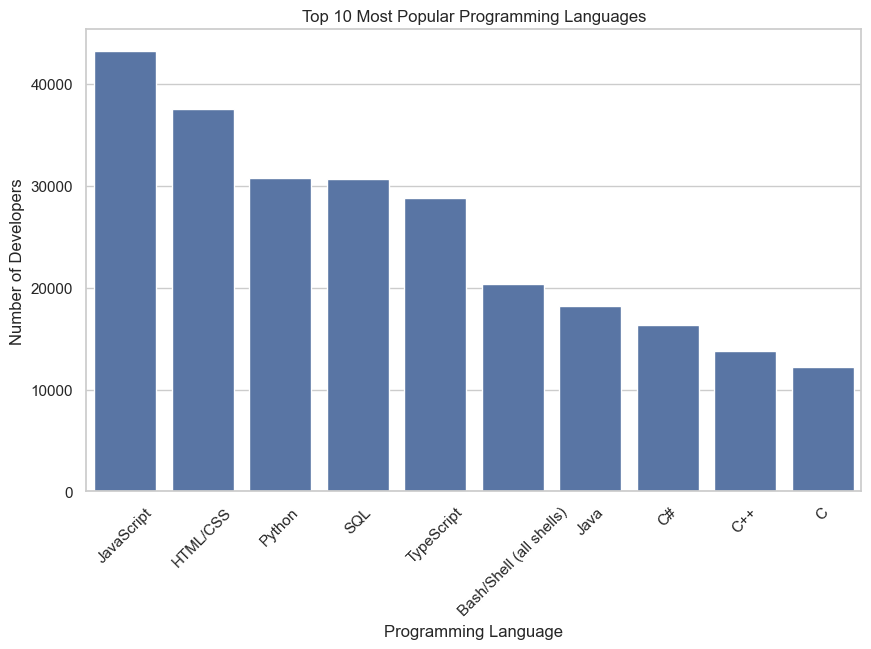

In [124]:
# Analyze the most popular programming languages
from collections import Counter

# Split the 'LanguageHaveWorkedWith' column and count occurrences
languages = df_cleaned['LanguageHaveWorkedWith'].str.split(';').explode()
language_counts = Counter(languages)

# Display the top 10 most popular languages
top_languages = language_counts.most_common(10)
print("Top 10 Most Popular Programming Languages:")
for lang, count in top_languages:
    print(f"{lang}: {count}")

# Visualize the top 10 languages
plt.figure(figsize=(10, 6))
sns.barplot(x=[lang for lang, count in top_languages], y=[count for lang, count in top_languages])
plt.title('Top 10 Most Popular Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Number of Developers')
plt.xticks(rotation=45)
plt.show()

Observation : The most popular programming languages are JavaScript, HTML/CSS, and Python.

 ## What is the distribution of developers by country?

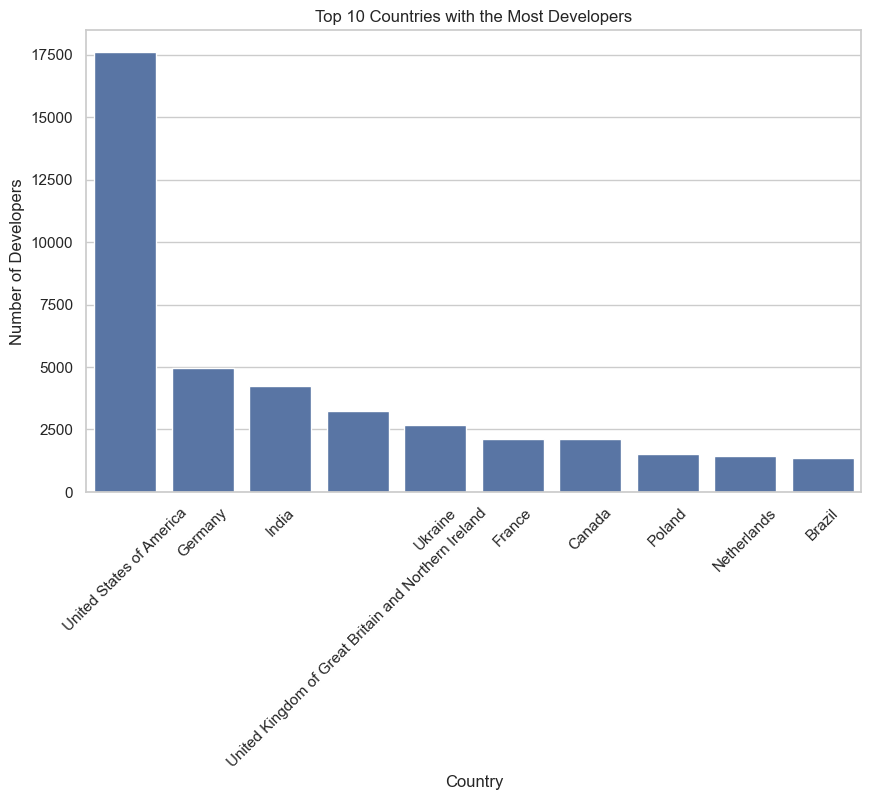

In [125]:
# Analyze the distribution of developers by country
country_counts = df_cleaned['Country'].value_counts().head(10)

# Visualize the top 10 countries
plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Top 10 Countries with the Most Developers')
plt.xlabel('Country')
plt.ylabel('Number of Developers')
plt.xticks(rotation=45)
plt.show()

Observation : the United States, India, and Germany have the highest number of developers.

### handiling catagorical values by converting it to numrical from 0 to ..

### to be passed to the model 

In [126]:
def encode_categorical_variables(df):
    """
    Encode categorical columns using LabelEncoder.
    
    Parameters:
    - df (pd.DataFrame): The dataset with categorical features.
    
    Returns:
    - pd.DataFrame: Dataset with encoded categorical variables.
    """
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns
    # Apply LabelEncoder to each categorical column
    for col in categorical_columns:
        df[col] = encoder.fit_transform(df[col])
    return df


# Modeling

In this section, i will build a classification model to predict the target variable `AISelect`.  
We will:
- Split the data into training and testing sets.
- Encode categorical features.
- Train a RandomForestClassifier.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier



# Select features (X) and target variable (y)
X = df_cleaned.drop(columns=['AISelect'])  # Features (excluding target column)
y = df_cleaned['AISelect']  # Target variable

# handiling catagorical_columns
X = encode_categorical_variables(X)

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing data
print(f"Features shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")

# Initialize the Random Forest classifier model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)



Features shape (X): (65437, 17)
Target shape (y): (65437,)


RandomForestClassifier(random_state=42)

In [96]:
df_cleaned.to_csv("survey_results().csv",index=False)

# Evaluation


F1 Score: 0.6556
Recall: 0.6960
Precision: 0.6703
Accuracy: 0.6960


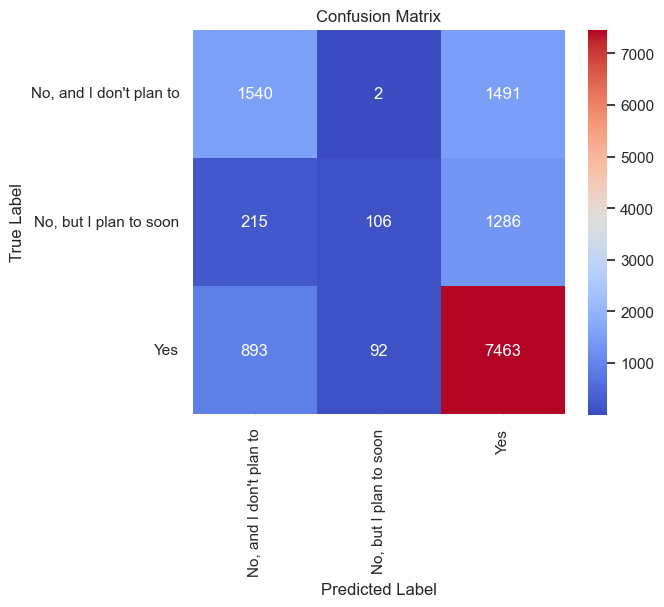

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted to handle class imbalance
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Print scores with better formatting
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with better visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()




- **Model Performance:**  
  The model achieves an overall accuracy of *0.696* with weighted precision, recall, and F1 scores of *0.6703*, *0.6960*, and *0.6556* respectively.
  
- **Confusion Matrix Analysis:**  
  The confusion matrix indicates that the model performs well for the majority class but may misclassify some of the minority classes.  
  
- **Areas for Improvement:**  
  - **Class Imbalance:** Consider techniques like SMOTE or class weighting.
  - **Feature Engineering:** Investigate additional features to better separate the classes.
  - **Model Tuning:** Experiment with other algorithms (e.g., Gradient Boosting) and hyperparameter tuning.

# Conclusion

This analysis provided insights into developers' behaviors and preferences. While the model gives a good baseline, further improvements could lead to better performance and deeper insights.
